# Cello 2  simulated annealing

### Python imports

In [5]:
from dgd.utils.utils5 import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import json
import networkx as nx
from tqdm.notebook import tqdm
import json

### Define signals

In [2]:
#POSTECH's data

input_signals_list_small_molecules = [
    {0: 0.0278, 1: 0.0022, 2: 0.0042},  # First set of input signals
    {0: 0.0278, 1: 0.0022, 2: 2.0082},  # Second set of input signals
    {0: 0.0278, 1: 5.0543, 2: 0.0042},  # Third set of input signals
    {0: 0.0278, 1: 5.0543, 2: 2.0082},  # First set of input signals
    {0: 3.9239, 1: 0.0022, 2: 0.0042},  # Second set of input signals
    {0: 3.9239, 1: 0.0022, 2: 2.0082},  # Third set of input signals    
    {0: 3.9239, 1: 5.0543, 2: 0.0042},  # Second set of input signals
    {0: 3.9239, 1: 5.0543, 2: 2.0082},  # Third set of input signals  
]    

input_signals_list_binary = [
    {0: 0, 1: 0, 2: 0},  # First set of input signals
    {0: 0, 1: 0, 2: 1},  # Second set of input signals
    {0: 0, 1: 1, 2: 0},  # Third set of input signals
    {0: 0, 1: 1, 2: 1},  # First set of input signals
    {0: 1, 1: 0, 2: 0},  # Second set of input signals
    {0: 1, 1: 0, 2: 1},  # Third set of input signals    
    {0: 1, 1: 1, 2: 0},  # Second set of input signals
    {0: 1, 1: 1, 2: 1},  # Third set of input signals  
]   

### Import response function experimental data

In [3]:
#postech data

import pandas as pd

# Data
repressor_data = {
    "Repressor": ["AmeR", "AmtR", "BetI", "BM3R1", "BM3R1", "BM3R1", "HlyIIR", "IcaRA", "LitR", "LmrA", 
                  "PhlF", "PhlF", "PhlF", "PsrA", "QacR", "QacR", "SrpR", "SrpR", "SrpR", "SrpR"],
    "RBS": ["F1", "A1", "E1", "B1", "B2", "B3", "H1", "I1", "L1", "N1", 
            "P1", "P2", "P3", "R1", "Q1", "Q2", "S1", "S2", "S3", "S4"],
    "ymaxa": [3.835, 5.036, 3.065, 0.543, 0.822, 0.704, 2.462, 3.558, 4.296, 2.152,
              3.901, 6.505, 6.794, 6.489, 3.744, 3.778, 1.216, 2.556, 2.547, 3.314],
    "ymina": [1.06, 0.091, 1e-14, 0.002, 1e-14, 1e-14, 0.057, 1e-14, 0.074, 0.183,
              0.01, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14],
    "Ka": [0.122, 0.022, 0.363, 0.051, 0.285, 0.261, 1e-14, 0.186, 1e-14, 1e-14,
          1e-14, 0.16, 0.167, 0.305, 0.126, 0.456, 1e-14, 0.224, 0.4, 0.108],
    "n": [1.306, 1.308, 1.833, 2.042, 1.685, 1.768, 2.596, 1.085, 1.696, 2.095,
          4, 2.237, 2.01, 1.54, 1.706, 1.979, 1.66, 1.337, 1.569, 1.344],
    "Toxicity (RPU)": ["-", "-", "-", "-", "-", "-", 4.06525, 0.47094, "-", "-", 
                       "-", "-", "-", "-", 4.06525, "-", "-", "-", "-", "-"]
}

# Create DataFrame
cello_v1_hill_function_parameters = pd.DataFrame(repressor_data)

cello_v1_hill_function_parameters


,Repressor,RBS,ymaxa,ymina,Ka,n,Toxicity (RPU)
0,AmeR,F1,3.835,1.060000e+00,1.220000e-01,1.306,-
1,AmtR,A1,5.036,9.100000e-02,2.200000e-02,1.308,-
2,BetI,E1,3.065,1.000000e-14,3.630000e-01,1.833,-
3,BM3R1,B1,0.543,2.000000e-03,5.100000e-02,2.042,-
4,BM3R1,B2,0.822,1.000000e-14,2.850000e-01,1.685,-
5,BM3R1,B3,0.704,1.000000e-14,2.610000e-01,1.768,-
6,HlyIIR,H1,2.462,5.700000e-02,1.000000e-14,2.596,4.06525
7,IcaRA,I1,3.558,1.000000e-14,1.860000e-01,1.085,0.47094
8,LitR,L1,4.296,7.400000e-02,1.000000e-14,1.696,-
9,LmrA,N1,2.152,1.830000e-01,1.000000e-14,2.095,-


### Import toxicity experimental data

In [6]:
# POSTECH's data
# Load the JSON file
file_path = '/home/gridsan/spalacios/DRL1/supercloud-testing/ABC-and-PPO-testing1/gate_toxicity_POSTECH.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract all gate toxicity data
gate_toxicity_data = [item for item in data if item.get("collection") == "gate_toxicity"]

# Convert the list of dictionaries into a DataFrame
gate_toxicity_df = pd.DataFrame(gate_toxicity_data)

gate_toxicity_df

,collection,gate_name,input,growth
0,gate_toxicity,F1_AmeR,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 0.936601827, 0.929528441, 0.927586207, 0.9..."
1,gate_toxicity,A1_AmtR,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 1.005567327, 0.987403446, 1.01189251, 1.01..."
2,gate_toxicity,E1_BetI,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 1.465830721, 1.017868339, 1.023301985, 1.0..."
3,gate_toxicity,B1_BM3R1,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 0.992753623, 0.971014493, 0.992914654, 0.9..."
4,gate_toxicity,B2_BM3R1,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 0.978445044, 1.001274554, 1.019855551, 0.9..."
5,gate_toxicity,B3_BM3R1,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 0.971657754, 0.970707071, 1.015062389, 0.9..."
6,gate_toxicity,H1_HlyIIR,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 0.931501911, 0.945850458, 0.941163746, 0.9..."
7,gate_toxicity,I1_IcaRA,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 1.019887906, 1.026628502, 1.028642482, 1.0..."
8,gate_toxicity,L1_LitR,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 1.034190532, 1.017241379, 1.034190532, 1.0..."
9,gate_toxicity,N1_LmrA,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 0.948325359, 0.884901648, 0.884237108, 0.8..."


### Import Cello topology designs

In [5]:
with open('output_run_postech_1_graphs.pkl', 'rb') as f:
    output_run_postech_1_graphs = pickle.load(f)


### Format Cello data structures 

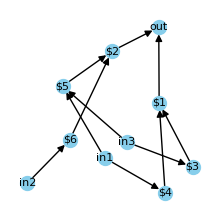

Nodes and their attributes:
Node $1:
Node out:
Node $2:
Node $3:
Node $4:
Node $5:
Node $6:
Node in2:
Node in3:
Node in1:


In [6]:
hex_string = "0x17"

G = output_run_postech_1_graphs[hex_string]

plt.figure(figsize=(2, 2))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, 
        edge_color='k', linewidths=1, font_size=8, 
        arrows=True, arrowsize=10)
plt.show()  

for node in G.nodes:
    G.nodes[node].clear()

# Step 3: Remove all edge attributes
for u, v in G.edges:
    G.edges[u, v].clear()


# Step 2: Print Node Attributes
print("Nodes and their attributes:")
for node, data in G.nodes(data=True):
    print(f"Node {node}:")
    for attr, value in data.items():
        print(f"  {attr}: {value}")

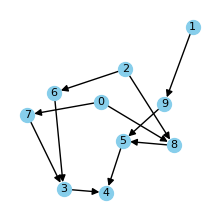

{3: [4],
 4: [],
 5: [4],
 6: [3],
 7: [3],
 8: [5],
 9: [5],
 1: [9],
 2: [8, 6],
 0: [8, 7]}

In [7]:
relabel_mapping = {
    "in1": 0,
    "in2": 1,
    "in3": 2
}

# Starting index for the rest of the nodes
next_label = 3

# Iterate over all nodes and assign labels to those not in the initial mapping
for node in G.nodes:
    if node not in relabel_mapping:
        relabel_mapping[node] = next_label
        next_label += 1

# Step 3: Relabel the nodes
G = nx.relabel_nodes(G, relabel_mapping)

plt.figure(figsize=(2, 2))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, 
        edge_color='k', linewidths=1, font_size=8, 
        arrows=True, arrowsize=10)
plt.show()  

G_cello = G
# Print the adjacency list to verify the relabeling
adj_list = {node: list(G.successors(node)) for node in G.nodes}
adj_list

### Visualize and analyze synthetic gene citcuit with a random gate assignment

Synthetic gene circuit


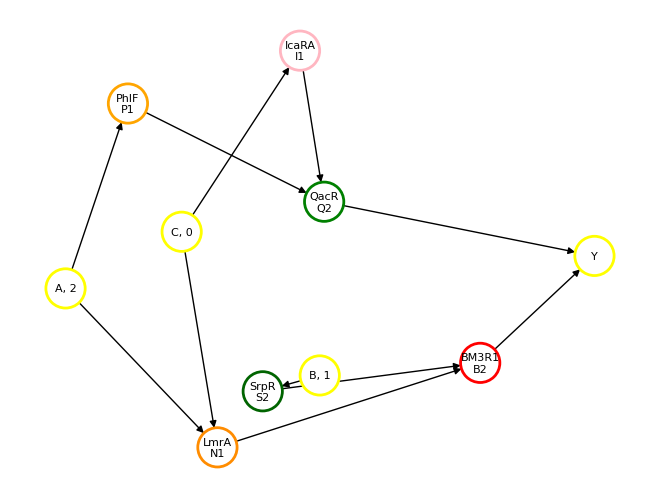

In [8]:
# Determine the size of the matrix
adjacency_list = adj_list

n = max(adjacency_list.keys()) + 1

# Initialize the adjacency matrix with zeros
adjacency_matrix = np.zeros((n, n), dtype=int)

# Fill the adjacency matrix based on the adjacency list
for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        adjacency_matrix[node, neighbor] = 1

adj_matrix = adjacency_matrix
random_solution = random_part_selection(cello_v1_hill_function_parameters, n-4)
G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, random_solution) 
print("Synthetic gene circuit")
draw_network_with_colors_and_labels_from_G(G)

### Visualize and analyze synthetic gene citcuit with a specific assignment

In [ ]:
solution = [12, 4, 2, 13, 1, 0]
G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, solution) 
print("Synthetic gene circuit")
draw_network_with_colors_and_labels_from_G(G)

In [ ]:
for node in G.nodes(data=True):
    print(f"Node {node[0]} has attributes {node[1]}")

In [ ]:
# Define the layout
pos = nx.spring_layout(G)

# Set uniform color for all nodes
color = 'lightblue'

plt.figure(figsize=(4, 4))

# Draw the graph with uniform node color
nx.draw(G, pos, with_labels=False, node_color=color, node_size=500, font_size=10, font_weight='bold')

# Draw node numbers (node labels)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Draw node labels showing repressors and RBS with an offset
repressor_labels = {n: f"{attr['Repressor']}, {attr['RBS']}" for n, attr in G.nodes(data=True) if 'Repressor' in attr}

# Offset the repressor labels slightly from the nodes
offset_pos = {node: (x, y - 0.05) for node, (x, y) in pos.items()}
nx.draw_networkx_labels(G, offset_pos, labels=repressor_labels, font_size=8, font_color='black')


# Display the graph
plt.show()

### Calcualte circuit score and toxicity

In [ ]:
expected_logic = simulate_signal_propagation_binary(G, input_signals_list_binary)
actual_logic = simulate_signal_propagation(G, input_signals_list_small_molecules)
current_score = calculate_circuit_score(expected_logic, actual_logic)
toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, G, gate_toxicity_df)

In [ ]:
actual_logic

In [ ]:
detailed_results

In [ ]:
toxicity_score

In [ ]:
actual_logic

In [ ]:
current_score

In [ ]:
is_roadblocking(G)

## Find permutation of the inputs

In [9]:
# Define the input nodes
input_nodes = [0, 1, 2]

In [10]:

def permute_graph(graph, permutation):
    # Create a mapping from old node to new node
    mapping = {old: new for old, new in zip(input_nodes, permutation)}
    # Create a new graph with the permuted nodes
    permuted_graph = nx.relabel_nodes(graph, mapping)
    return permuted_graph

# Generate all permutations of the input nodes
permutations = list(itertools.permutations(input_nodes))

# Create a list to store the permuted graphs
permuted_graphs = []

# Generate and store the permuted graphs
for perm in permutations:
    new_graph = permute_graph(G_cello, perm)
    if calculate_truth_table_v2(new_graph) == calculate_truth_table_v2(G_cello):
        print("perm: ", perm)
        permuted_graphs.append(new_graph)

perm:  (0, 1, 2)
perm:  (0, 2, 1)
perm:  (1, 0, 2)
perm:  (1, 2, 0)
perm:  (2, 0, 1)
perm:  (2, 1, 0)


## Plot permutations

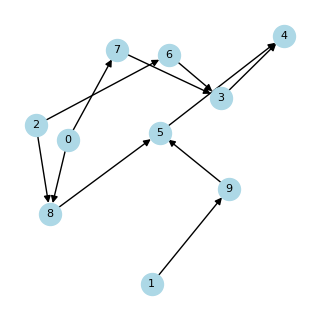

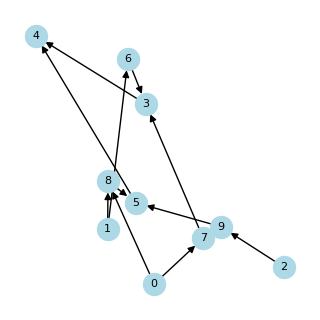

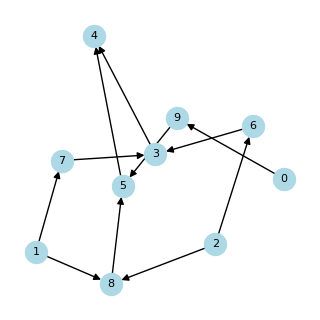

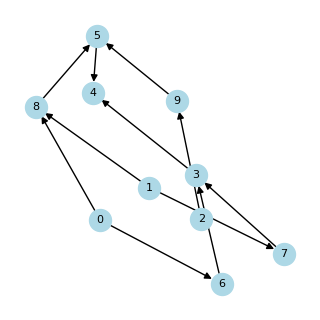

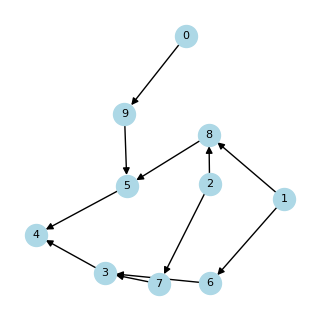

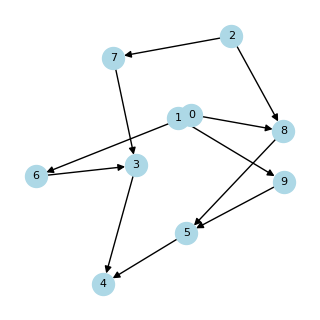

In [11]:
def small_topology_plot(graph_networkx):
    pos = nx.spring_layout(graph_networkx)
    color = 'lightblue'
    plt.figure(figsize=(3, 3))
    nx.draw(graph_networkx, pos, with_labels=False, node_color=color, node_size=250, font_size=10, font_weight='bold')
    nx.draw_networkx_labels(graph_networkx, pos, font_size=8, font_color='black')
    plt.show()

for topology_permutation in permuted_graphs:
    small_topology_plot(topology_permutation) 

## Simmulated annealing

In [18]:
import random

def getRandomGateFromUnassignedGroup(current_solution, gate_library):
    # Define the groups of gates
    group_AmeR = [0]
    group_AmtR = [1]
    group_BetI = [2]
    group_BM3R1 = [3, 4, 5]
    group_HlyIIR = [6]
    group_IcaRA = [7]
    group_LitR = [8]
    group_LmrA = [9]
    group_PhlF = [10, 11, 12]
    group_PsrA = [13]
    group_QacR = [14, 15]
    group_SrpR = [16, 17, 18, 19]
    
    # Step 1: Create a list of all groups for easier processing
    all_groups = [
        group_AmeR, group_AmtR, group_BetI, group_BM3R1, 
        group_HlyIIR, group_IcaRA, group_LitR, group_LmrA,
        group_PhlF, group_PsrA, group_QacR, group_SrpR
    ]
    
    # Step 2: Rule out groups that have integers in current solution
    available_groups = []
    for group in all_groups:
        # Check if any number from this group is in current_solution
        group_is_available = True
        for gate in group:
            if gate in current_solution:
                group_is_available = False
                break
        # If no number from this group is in current_solution, add it to available_groups
        if group_is_available:
            available_groups.append(group)
    
    # Step 3: Get a random group from available groups
    if not available_groups:  # Check if there are any available groups
        return None  # Return None if no groups are available
    random_group = random.choice(available_groups)
    
    # Step 4: Get a random integer from the selected group
    random_gate = random.choice(random_group)
    
    # Step 5: Return the randomly selected gate
    return random_gate


import random

def getRandomGateFromUnassignedGroup_with_max_inputs_restriction(current_solution, gate_library, G, gate_max_incoming_signals_df):
    # Define the groups of gates
    group_AmeR = [0]
    group_AmtR = [1]
    group_BetI = [2]
    group_BM3R1 = [3, 4, 5]
    group_HlyIIR = [6]
    group_IcaRA = [7]
    group_LitR = [8]
    group_LmrA = [9]
    group_PhlF = [10, 11, 12]
    group_PsrA = [13]
    group_QacR = [14, 15]
    group_SrpR = [16, 17, 18, 19]
    
    # Step 0: Remove gates that cannot be assigned based on incoming signals
    # Use the validate_max_incoming_signals function
    all_groups = [
        group_AmeR, group_AmtR, group_BetI, group_BM3R1, 
        group_HlyIIR, group_IcaRA, group_LitR, group_LmrA,
        group_PhlF, group_PsrA, group_QacR, group_SrpR
    ]
    
    filtered_groups = []
    for group in all_groups:
        filtered_group = []
        for gate in group:
            # Check if the gate can be assigned using validate_max_incoming_signals
            can_assign = validate_max_incoming_signals(
                graph=G,
                dataframe=gate_library,
                repressor_index=gate,
                gate_max_incoming_signals_df=gate_max_incoming_signals_df
            )
            if can_assign:
                filtered_group.append(gate)
        if filtered_group:
            filtered_groups.append(filtered_group)
    
    # If no gates are left after filtering, return None
    if not filtered_groups:
        return None
    
    # Step 1: Use the filtered groups for further processing
    all_groups = filtered_groups

    # Step 2: Rule out groups that have gates already in current_solution
    available_groups = []
    for group in all_groups:
        # Check if any gate from this group is in current_solution
        group_is_available = True
        for gate in group:
            if gate in current_solution:
                group_is_available = False
                break
        # If no gate from this group is in current_solution, add it to available_groups
        if group_is_available:
            available_groups.append(group)
    
    # Step 3: Get a random group from available groups
    if not available_groups:  # Check if there are any available groups
        return None  # Return None if no groups are available
    random_group = random.choice(available_groups)
    
    # Step 4: Get a random gate from the selected group
    random_gate = random.choice(random_group)
    
    # Step 5: Return the randomly selected gate
    return random_gate


In [ ]:
def simulated_annealing_cello2(
    adj_matrix, initial_solution, MAXTEMP, MINTEMP, steps, T0_steps,
    input_signals_list_small_molecules, input_signals_list_binary,
    gate_library, gate_toxicity_df, D_GROWTH_THRESHOLD=0.75, print_statements = False, plot = False
):
    """
    This function implements the simulated annealing algorithm in Cello 2.

    Parameters:
    - df: DataFrame containing gate data.
    - adj_matrix: adjacency matrix of the circuit.
    - initial_solution: initial assignment of gates to nodes (list of indices in df).
    - MAXTEMP, MINTEMP: initial and final temperatures.
    - steps: number of steps before reaching Tmin.
    - T0_steps: number of steps at Tmin.
    - input_signals_list_small_molecules: list of input signals for simulation.
    - input_signals_list_binary: list of expected binary outputs.
    - gate_toxicity_df: DataFrame containing toxicity data.
    - D_GROWTH_THRESHOLD: growth threshold for toxicity evaluation.
    """

    # Initialize current solution
    G_initial = assign_representations_with_io_nodes_3(adj_matrix, gate_library, initial_solution)    
    expected_logic_initial = simulate_signal_propagation_binary(G_initial, input_signals_list_binary)
    actual_logic_initial = simulate_signal_propagation(G_initial, input_signals_list_small_molecules)
    circuit_score_initial = calculate_circuit_score(expected_logic_initial, actual_logic_initial)
    toxicity_score_initial, detailed_results_initial = calculate_toxicity_score(input_signals_list_small_molecules, G_initial, gate_toxicity_df)
    
    optimal_score = circuit_score_initial
    optimal_toxicty = toxicity_score_initial
    optimal_solution = initial_solution.copy()
    
    # Initialize current solution
    current_solution = initial_solution.copy()
    
    # Temperature parameters
    LOGMAX = math.log10(MAXTEMP)
    LOGMIN = math.log10(MINTEMP)
    LOGINC = (LOGMAX - LOGMIN) / steps

    total_steps = steps + T0_steps

  
    # Lists to track scores for visualization
    iteration_numbers = []
    optimal_scores = []


    for j in tqdm(range(total_steps), desc="Optimizing", leave=True):
        logTemperature = LOGMAX - j * LOGINC 
        temperature = math.pow(10, logTemperature)
        
        if j >= steps:
            temperature = 0.0
        
        
        print("temp",  temperature) if print_statements else None       
        print("log(temp)", logTemperature) if print_statements else None

        G_current = assign_representations_with_io_nodes_3(adj_matrix, gate_library, current_solution)
        expected_logic_current = simulate_signal_propagation_binary(G_current, input_signals_list_binary)
        actual_logic_current = simulate_signal_propagation(G_current, input_signals_list_small_molecules)
        circuit_score_current = calculate_circuit_score(expected_logic_current, actual_logic_current)
        toxicity_score_current, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, G_current, gate_toxicity_df)
        
        #rejectImmediately = False;
        #tandemSwap = False; not used    
        
        # Decide whether to perform tandem swap or gate swap
        r = random.random()
        
        #if (r < thresh):
        #    tandemSwap = True;
        
        print("Current solution: ", current_solution) if print_statements else None    
        
           
        # If gate <-> library swap
        gateA = getRandomGateFromUnassignedGroup(current_solution, gate_library);
        #gateA_types = getGateTypeinLibrary(gateA)
        if (gateA == None):
            gateA = random.choice(current_solution)
        
        while True:
            gateB = random.choice(current_solution);
            #if (gateA != gateB and gateA_type == gateBtype):
            if (gateA != gateB):
                break     
                
        #if not tandem swap
        #if !tandemSwap: Not used
        roadblock_flags_before = is_roadblocking(G)
        numBlockedBefore = len(roadblock_flags_before[1])

        if gateA in current_solution and gateB in current_solution:
            new_solution = swap_within_circuit(current_solution, gateA, gateB)
        else:
            circuit_gate = gateB
            library_gate = gateA
            new_solution = swap_with_library(current_solution, circuit_gate, library_gate)

        G_new = assign_representations_with_io_nodes_3(adj_matrix, gate_library, new_solution)
        roadblock_flags_after = is_roadblocking(G_new)
        numBlockedAfter = len(roadblock_flags_after[1])

        if (numBlockedAfter > numBlockedBefore):
            
            # roadblocking is worse, so reject
            iteration_numbers.append(j)
            optimal_scores.append(optimal_score)
            continue #go to the next iteration
          
        # evaluate
        actual_logic_new = simulate_signal_propagation(G_new, input_signals_list_small_molecules)
        expected_logic_new = simulate_signal_propagation_binary(G_new, input_signals_list_binary)
        circuit_score_new = calculate_circuit_score(expected_logic_new, actual_logic_new)
        toxicity_score_new, detailed_results_new = calculate_toxicity_score(input_signals_list_small_molecules, G_new, gate_toxicity_df)

        if (toxicity_score_current < D_GROWTH_THRESHOLD):
            if (toxicity_score_new > toxicity_score_current):
                print("Accept immediately -- already below mimimum growth threshold, and this swap helps.") if print_statements else None
                
                current_solution = new_solution.copy()
                
                if circuit_score_new > optimal_score and (toxicity_score_new >= D_GROWTH_THRESHOLD):
                    optimal_score = circuit_score_new
                    optimal_toxicty = toxicity_score_new
                    optimal_solution = new_solution.copy()
                
                iteration_numbers.append(j)
                optimal_scores.append(optimal_score)
                
                continue
            else:
                # undo
                #rejectImmediately = True
                print("Reject immediately -- already below mimimum growth threshold, and this swap does not help.") if print_statements else None
                
                iteration_numbers.append(j)
                optimal_scores.append(optimal_score)
                
                continue

        elif (toxicity_score_new < D_GROWTH_THRESHOLD):
        # // undo
            #rejectImmediately = True;
            print("Reject immediately -- below minimum growth threshold.") if print_statements else None
            
            iteration_numbers.append(j)
            optimal_scores.append(optimal_score)
            
            continue

        # Not used    
        #undo
        #if (rejectImmediately):
        #    #Undo solution
        #    pass
        
        #acept or reject 
        before = circuit_score_current
        after = circuit_score_new
        #probability = math.exp((after - before) / temperature)
        #probability = safe_exp((after - before) / temperature)
        
        if temperature == 0:
            # Only accept improvements when temperature is 0
            probability = 1.0 if after > before else 0.0
        else:
            probability = safe_exp((after - before) / temperature)          
        
        ep = random.random()  # Returns a float between 0.0 and 1.0

        if (ep < probability):
            #accept
            print("Accept") if print_statements else None
            current_solution = new_solution.copy()
            
            if circuit_score_new > optimal_score and (toxicity_score_new >= D_GROWTH_THRESHOLD):
                optimal_score = circuit_score_new
                optimal_toxicty = toxicity_score_new
                optimal_solution = new_solution.copy()
            
        else:
            #reject swap
            pass
        


        iteration_numbers.append(j)
        optimal_scores.append(optimal_score)

    if (plot):    
        # Plotting iterations vs highest score
        plt.figure(figsize=(8, 4))
        plt.plot(iteration_numbers, optimal_scores, marker='o', markersize=3, linestyle='--', color='b')
        plt.title('Iterations vs Highest Score')
        plt.xlabel('Iteration')
        plt.ylabel('Circuit Score')
        plt.show()

    # Optionally, draw the final network
    #draw_network_with_colors_and_labels_from_G(G)

    return optimal_score, optimal_toxicty, optimal_solution



In [20]:
def safe_exp(x):
    try:
        return math.exp(x)
    except OverflowError:
        if x > 0:
            return float('inf')
        return 0

In [ ]:
'''

initial_solution = random_part_selection(cello_v1_hill_function_parameters, 5)
MAXTEMP = 100.0
MINTEMP = 0.001
steps = 600
T0_steps = 100

optimal_score, optimal_toxicty, optimal_solution = simulated_annealing_cello2(
    adj_matrix, initial_solution, MAXTEMP, MINTEMP, steps, T0_steps,
    input_signals_list_small_molecules, input_signals_list_binary,
    cello_v1_hill_function_parameters, gate_toxicity_df, D_GROWTH_THRESHOLD=0.75
)


optimal_score, optimal_toxicty, optimal_solution
'''

In [ ]:
G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, optimal_solution) 
print("Synthetic gene circuit")
draw_network_with_colors_and_labels_from_G(G)

In [ ]:
# Define the layout
pos = nx.spring_layout(G)

# Set uniform color for all nodes
color = 'lightblue'

plt.figure(figsize=(4, 4))

# Draw the graph with uniform node color
nx.draw(G, pos, with_labels=False, node_color=color, node_size=500, font_size=10, font_weight='bold')

# Draw node numbers (node labels)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Draw node labels showing repressors and RBS with an offset
repressor_labels = {n: f"{attr['Repressor']}, {attr['RBS']}" for n, attr in G.nodes(data=True) if 'Repressor' in attr}

# Offset the repressor labels slightly from the nodes
offset_pos = {node: (x, y - 0.05) for node, (x, y) in pos.items()}
nx.draw_networkx_labels(G, offset_pos, labels=repressor_labels, font_size=8, font_color='black')


# Display the graph
plt.show()

In [7]:
circuit_name = "0x17"

file_name = "/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/scripts/runs/20250610_run1_0x17_sampling_bias/optimal_topologies/optimal_topologies.pkl"

with open(file_name, "rb") as f:
    reduced_graphs = pickle.load(f)   
 
print(f"Number of biological circuits: {len(reduced_graphs)}")


selected_graph = 2  
permutation_index = 2
    
Gi = permuted_graphs[permutation_index]
nodelist = sorted(Gi.nodes())
adj_matrix_sparse = nx.adjacency_matrix(Gi, nodelist=nodelist)
adj_matrix = adj_matrix_sparse.toarray()

Number of biological circuits: 7


NameError: name 'permuted_graphs' is not defined

In [ ]:
saved_run_results = []
run_number = []
num_runs = 3
top_circuit_score = 0
top_toxicity_score = 0
top_solution = 0

for run in range(0, num_runs):
    initial_solution = random_part_selection(cello_v1_hill_function_parameters, 5)
    MAXTEMP = 100.0
    MINTEMP = 0.001
    steps = 600
    T0_steps = 100

    optimized_score, optimal_toxicty, optimal_solution = simulated_annealing_cello2(
        adj_matrix, initial_solution, MAXTEMP, MINTEMP, steps, T0_steps,
        input_signals_list_small_molecules, input_signals_list_binary,
        cello_v1_hill_function_parameters, gate_toxicity_df, D_GROWTH_THRESHOLD=0.75)

    saved_run_results.append(optimized_score)
    run_number.append(run)
    
    if optimized_score > top_circuit_score:
        top_circuit_score = optimized_score
        top_toxicity_score = optimal_toxicty
        top_solution = optimal_solution

# Plotting iterations vs highest score
plt.figure(figsize=(8, 4))
plt.scatter(run_number, saved_run_results, color='b')
plt.title('Iterations vs Highest Score')
plt.xlabel('Iteration')
plt.ylabel('Circuit Score')
plt.show()

In [ ]:
saved_run_results

In [ ]:
G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, top_solution) 
print("Synthetic gene circuit")
draw_network_with_colors_and_labels_from_G(G)

## Incorporate validaiton for maximum number of input signals

In [12]:
gate_max_incoming_signals = {
    "gate_max_incoming_signals": [2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
}

# Create DataFrame
gate_max_incoming_signals_df = pd.DataFrame(gate_max_incoming_signals)

gate_max_incoming_signals_df

,gate_max_incoming_signals
0,2
1,2
2,1
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [ ]:
'''

gate_types = {
    "gate_type": ["NOR", "NOR", "NOT", "NOR", "NOR", "NOR", "NOR", "NOR", "NOR", "NOR", 
            "NOR", "NOR", "NOR", "NOR", "NOR", "NOR", "NOR", "NOR", "NOR", "NOR"]
}

# Create DataFrame
gate_types_df = pd.DataFrame(gate_types)

gate_types_df

gate_types_df.loc[2, "gate_type"]

'''

In [13]:
import networkx as nx
import pandas as pd
import numpy as np

def assign_random_repressors(adj_matrix, df, gate_max_incoming_signals_df):
    """
    Assigns random repressors/RBS from the library to nodes in a DAG, ensuring no repressor is repeated and
    that nodes do not exceed the maximum allowed incoming edges for their assigned gate.

    Parameters:
    adj_matrix (numpy.ndarray): Adjacency matrix representing the graph.
    df (pandas.DataFrame): DataFrame containing the library of repressors/RBS and their properties.
    gate_max_incoming_signals_df (pandas.DataFrame): DataFrame containing maximum allowed incoming signals for each gate.

    Returns:
    networkx.DiGraph: The graph with assigned repressors/RBS and node attributes.
    list: A list of repressor indices corresponding to the assigned repressors, in the order of non-input/output nodes.
    """
    # Create the DAG from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
    
    # Remove disconnected nodes (nodes with neither incoming nor outgoing edges)
    disconnected_nodes = [node for node in G.nodes() if G.in_degree(node) == 0 and G.out_degree(node) == 0]
    G.remove_nodes_from(disconnected_nodes)
    
    # Identify input and output nodes
    input_nodes = [node for node in G.nodes() if G.in_degree(node) == 0]
    output_nodes = [node for node in G.nodes() if G.out_degree(node) == 0]
    
    # List of non-input/output nodes
    non_io_nodes = [node for node in G.nodes() if node not in input_nodes and node not in output_nodes]
    # Sort non_io_nodes to maintain a consistent order
    non_io_nodes.sort()
    
    # Initialize the list to keep track of assigned repressor indices
    node_representation_indices = []
    
    # Copy the dataframe to keep track of available repressors
    available_repressors = df.copy()
    # Add the 'gate_max_incoming_signals' to the available_repressors DataFrame
    available_repressors = available_repressors.merge(gate_max_incoming_signals_df, left_index=True, right_index=True)
    
    # Assign repressors to nodes
    for node in non_io_nodes:
        incoming_edges = G.in_degree(node)
        
        # Filter repressors that can handle at least this many incoming edges
        valid_repressors = available_repressors[
            available_repressors['gate_max_incoming_signals'] >= incoming_edges
        ]
        
        # Remove repressors that have already been assigned
        assigned_repressors = [G.nodes[n]['Repressor'] for n in G.nodes() if 'Repressor' in G.nodes[n]]
        valid_repressors = valid_repressors[~valid_repressors['Repressor'].isin(assigned_repressors)]
        
        if valid_repressors.empty:
            raise ValueError(f"No valid repressors available for node {node} with {incoming_edges} incoming edges.")
        
        # Randomly select one repressor
        selected_repressor = valid_repressors.sample(n=1)
        rep_index = selected_repressor.index[0]
        
        # Assign all columns as attributes to the node
        for col in df.columns:
            G.nodes[node][col] = df.loc[rep_index, col]
        
        # Keep track of the assigned repressor index
        node_representation_indices.append(rep_index)
        
        # Remove the assigned repressor from available_repressors
        available_repressors = available_repressors[available_repressors['Repressor'] != df.loc[rep_index, 'Repressor']]
    
    # Set 'type' attribute for input and output nodes
    for node in input_nodes:
        G.nodes[node]['type'] = 'input'
    for node in output_nodes:
        G.nodes[node]['type'] = 'output'
    
    return G, node_representation_indices

In [ ]:
GTEST, node_representation_indices = assign_random_repressors(adj_matrix, cello_v1_hill_function_parameters, gate_max_incoming_signals_df)
draw_network_with_colors_and_labels_from_G(GTEST)

GTWIN = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, node_representation_indices)
draw_network_with_colors_and_labels_from_G(GTWIN)

# Define the layout
pos = nx.spring_layout(GTEST)

# Set uniform color for all nodes
color = 'lightblue'

plt.figure(figsize=(4, 4))

# Draw the graph with uniform node color
nx.draw(GTEST, pos, with_labels=False, node_color=color, node_size=500, font_size=10, font_weight='bold')

# Draw node numbers (node labels)
nx.draw_networkx_labels(GTEST, pos, font_size=12, font_color='black')

# Draw node labels showing repressors and RBS with an offset
repressor_labels = {n: f"{attr['Repressor']}, {attr['RBS']}" for n, attr in GTEST.nodes(data=True) if 'Repressor' in attr}

# Offset the repressor labels slightly from the nodes
offset_pos = {node: (x, y - 0.05) for node, (x, y) in pos.items()}
nx.draw_networkx_labels(GTEST, offset_pos, labels=repressor_labels, font_size=8, font_color='black')


# Display the graph
plt.show()

for node in GTEST.nodes(data=True):
    print(f"Node {node[0]} has attributes {node[1]}")

In [14]:
# Define the function
def get_incoming_edges(graph, dataframe, repressor_index):
    """
    Get the number of incoming edges for a node in the graph corresponding to a repressor and RBS in the dataframe.
    
    Parameters:
    graph (networkx.DiGraph): The directed graph.
    dataframe (pd.DataFrame): The dataframe containing repressor and RBS information.
    repressor_index (int): The index of the repressor in the dataframe.
    
    Returns:
    int: Number of incoming edges for the corresponding node in the graph.
    """
    # Get the repressor and RBS from the dataframe
    repressor_name = dataframe.loc[repressor_index, "Repressor"]
    rbs_name = dataframe.loc[repressor_index, "RBS"]
    
    # Find the node in the graph with matching Repressor and RBS attributes
    for node, attributes in graph.nodes(data=True):
        if attributes.get("Repressor") == repressor_name and attributes.get("RBS") == rbs_name:
            # Return the number of incoming edges
            return graph.in_degree(node)
    
    # If no matching node is found
    raise ValueError(f"Node with Repressor '{repressor_name}' and RBS '{rbs_name}' not found in the graph.")


def validate_max_inputs(graph, dataframe, repressor_index_a, repressor_index_b, gate_max_incoming_signals_df):
    """
    Validates that the number of incoming signals in Gate A does not exceed 
    the maximum allowed incoming signals for Gate B.

    Parameters:
    graph (networkx.DiGraph): The directed graph.
    dataframe (pd.DataFrame): The dataframe containing repressor and RBS information.
    repressor_index_a (int): The index of Gate A's repressor in the dataframe.
    repressor_index_b (int): The index of Gate B's repressor in the dataframe.
    gate_max_incoming_signals_df (pd.DataFrame): DataFrame containing maximum incoming signal limits for each gate.

    Returns:
    bool: True if the conditions are satisfied, False otherwise.
    """
    try:
        # Get the number of incoming signals for Gate B (always in circuit)
        incoming_signals_b = get_incoming_edges(graph, dataframe, repressor_index_b)

        # Get the maximum number of incoming signals allowed for Gate A (in circuit or library)
        max_incoming_signals_a = gate_max_incoming_signals_df.loc[repressor_index_a, "gate_max_incoming_signals"]

        # Validate the condition
        if incoming_signals_b <= max_incoming_signals_a:
            return True
        else:
            return False
    except ValueError as e:
        print(e)
        return False


def simulated_annealing_cello2_with_max_inputs_check(
    adj_matrix, initial_solution, MAXTEMP, MINTEMP, steps, T0_steps,
    input_signals_list_small_molecules, input_signals_list_binary,
    gate_library, gate_toxicity_df, gate_max_incoming_signals_df, D_GROWTH_THRESHOLD=0.75, print_statements = False, plot = False
):
    """
    This function implements the simulated annealing algorithm in Cello 2.

    Parameters:
    - df: DataFrame containing gate data.
    - adj_matrix: adjacency matrix of the circuit.
    - initial_solution: initial assignment of gates to nodes (list of indices in df).
    - MAXTEMP, MINTEMP: initial and final temperatures.
    - steps: number of steps before reaching Tmin.
    - T0_steps: number of steps at Tmin.
    - input_signals_list_small_molecules: list of input signals for simulation.
    - input_signals_list_binary: list of expected binary outputs.
    - gate_toxicity_df: DataFrame containing toxicity data.
    - gate_max_incoming_signals_df: DataFrame containing the max number of incoming signals by gate.
    - D_GROWTH_THRESHOLD: growth threshold for toxicity evaluation.
    """

    # Initialize current solution
    G_initial = assign_representations_with_io_nodes_3(adj_matrix, gate_library, initial_solution)    
    expected_logic_initial = simulate_signal_propagation_binary(G_initial, input_signals_list_binary)
    actual_logic_initial = simulate_signal_propagation(G_initial, input_signals_list_small_molecules)
    circuit_score_initial = calculate_circuit_score(expected_logic_initial, actual_logic_initial)
    toxicity_score_initial, detailed_results_initial = calculate_toxicity_score(input_signals_list_small_molecules, G_initial, gate_toxicity_df)
    
    optimal_score = 0
    optimal_toxicty = 0
    optimal_solution = []
    
    if circuit_score_initial > optimal_score and (toxicity_score_initial >= D_GROWTH_THRESHOLD) and (not is_roadblocking(G_initial)[0]):
        optimal_score = circuit_score_initial
        optimal_toxicty = toxicity_score_initial
        optimal_solution = initial_solution.copy()
                 
   
    # Initialize current solution
    current_solution = initial_solution.copy()
    
    # Temperature parameters
    LOGMAX = math.log10(MAXTEMP)
    LOGMIN = math.log10(MINTEMP)
    LOGINC = (LOGMAX - LOGMIN) / steps

    total_steps = steps + T0_steps

  
    # Lists to track scores for visualization
    iteration_numbers = []
    optimal_scores = []


    for j in tqdm(range(total_steps), desc="Optimizing", leave=True):
        logTemperature = LOGMAX - j * LOGINC 
        temperature = math.pow(10, logTemperature)
        
        if j >= steps:
            temperature = 0.0
        
        
        print("temp",  temperature) if print_statements else None       
        print("log(temp)", logTemperature) if print_statements else None

        G_current = assign_representations_with_io_nodes_3(adj_matrix, gate_library, current_solution)
        expected_logic_current = simulate_signal_propagation_binary(G_current, input_signals_list_binary)
        actual_logic_current = simulate_signal_propagation(G_current, input_signals_list_small_molecules)
        circuit_score_current = calculate_circuit_score(expected_logic_current, actual_logic_current)
        toxicity_score_current, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, G_current, gate_toxicity_df)
        
        #rejectImmediately = False;
        #tandemSwap = False; not used    
        
        # Decide whether to perform tandem swap or gate swap
        r = random.random()
        
        #if (r < thresh):
        #    tandemSwap = True;
        
        print("Current solution: ", current_solution) if print_statements else None    
        # If gate <-> library swap

        gateA = getRandomGateFromUnassignedGroup_with_max_inputs_restriction(current_solution, gate_library, G_current, gate_max_incoming_signals_df)
        print("gateA from library: ", gateA) if print_statements else None  
        
        #gateA = getRandomGateFromUnassignedGroup(current_solution, gate_library);
        #gateA_types = getGateTypeinLibrary(gateA)        
        
        if (gateA == None):
            gateA = random.choice(current_solution)
            print("gateA from circuit: ", gateA) if print_statements else None  
        
        while True:
            gateB = random.choice(current_solution);
            swap_allowed_flag = validate_max_inputs(G_current, gate_library, gateA, gateB, gate_max_incoming_signals_df)
            #if (gateA != gateB and gateA_type == gateBtype):
            if (gateA != gateB) and swap_allowed_flag:
                print("gateB from circuit: ", gateB) if print_statements else None  
                break     
                

        #if not tandem swap
        #if !tandemSwap: Not used
        roadblock_flags_before = is_roadblocking(G)
        numBlockedBefore = len(roadblock_flags_before[1])

        if gateA in current_solution and gateB in current_solution:
            new_solution = swap_within_circuit(current_solution, gateA, gateB)
        else:
            circuit_gate = gateB
            library_gate = gateA
            new_solution = swap_with_library(current_solution, circuit_gate, library_gate)

        G_new = assign_representations_with_io_nodes_3(adj_matrix, gate_library, new_solution)
        roadblock_flags_after = is_roadblocking(G_new)
        numBlockedAfter = len(roadblock_flags_after[1])

        if (numBlockedAfter > numBlockedBefore):
            
            # roadblocking is worse, so reject
            iteration_numbers.append(j)
            optimal_scores.append(optimal_score)
            continue #go to the next iteration
          
        # evaluate
        actual_logic_new = simulate_signal_propagation(G_new, input_signals_list_small_molecules)
        expected_logic_new = simulate_signal_propagation_binary(G_new, input_signals_list_binary)
        circuit_score_new = calculate_circuit_score(expected_logic_new, actual_logic_new)
        toxicity_score_new, detailed_results_new = calculate_toxicity_score(input_signals_list_small_molecules, G_new, gate_toxicity_df)

        if (toxicity_score_current < D_GROWTH_THRESHOLD):
            if (toxicity_score_new > toxicity_score_current):
                print("Accept immediately -- already below mimimum growth threshold, and this swap helps.") if print_statements else None
                
                current_solution = new_solution.copy()
                
                if circuit_score_new > optimal_score and (toxicity_score_new >= D_GROWTH_THRESHOLD) and (not is_roadblocking(G_new)[0]):
                    optimal_score = circuit_score_new
                    optimal_toxicty = toxicity_score_new
                    optimal_solution = new_solution.copy()
                
                iteration_numbers.append(j)
                optimal_scores.append(optimal_score)
                
                continue
            else:
                # undo
                #rejectImmediately = True
                print("Reject immediately -- already below mimimum growth threshold, and this swap does not help.") if print_statements else None
                
                iteration_numbers.append(j)
                optimal_scores.append(optimal_score)
                
                continue

        elif (toxicity_score_new < D_GROWTH_THRESHOLD):
        # // undo
            #rejectImmediately = True;
            print("Reject immediately -- below minimum growth threshold.") if print_statements else None
            
            iteration_numbers.append(j)
            optimal_scores.append(optimal_score)
            
            continue

        # Not used    
        #undo
        #if (rejectImmediately):
        #    #Undo solution
        #    pass
        
        #acept or reject 
        before = circuit_score_current
        after = circuit_score_new
        #probability = math.exp((after - before) / temperature)
        #probability = safe_exp((after - before) / temperature)
        
        if temperature == 0:
            # Only accept improvements when temperature is 0
            probability = 1.0 if after > before else 0.0
        else:
            probability = safe_exp((after - before) / temperature)          
        
        ep = random.random()  # Returns a float between 0.0 and 1.0

        if (ep < probability):
            #accept
            print("Accept") if print_statements else None
            current_solution = new_solution.copy()
            
            if circuit_score_new > optimal_score and (toxicity_score_new >= D_GROWTH_THRESHOLD) and (not is_roadblocking(G_new)[0]):
                optimal_score = circuit_score_new
                optimal_toxicty = toxicity_score_new
                optimal_solution = new_solution.copy()
            
        else:
            #reject swap
            pass
        


        iteration_numbers.append(j)
        optimal_scores.append(optimal_score)

    if (plot):    
        # Plotting iterations vs highest score
        plt.figure(figsize=(8, 4))
        plt.plot(iteration_numbers, optimal_scores, marker='o', markersize=3, linestyle='--', color='b')
        plt.title('Iterations vs Highest Score')
        plt.xlabel('Iteration')
        plt.ylabel('Circuit Score')
        plt.show()

    # Optionally, draw the final network
    #draw_network_with_colors_and_labels_from_G(G)

    return optimal_score, optimal_toxicty, optimal_solution



In [15]:
def validate_max_incoming_signals(graph, dataframe, repressor_index, gate_max_incoming_signals_df):
    """
    Checks whether there is at least one non-input/output node in the graph where the gate with the given
    repressor index can be assigned without exceeding its maximum allowed incoming signals.

    Parameters:
    graph (networkx.DiGraph): The directed graph.
    dataframe (pd.DataFrame): The dataframe containing repressor information.
    repressor_index (int): The repressor index of the gate in the dataframe.
    gate_max_incoming_signals_df (pd.DataFrame): DataFrame containing maximum allowed incoming signals.

    Returns:
    bool: True if at least one node can accommodate the gate, False otherwise.
    """
    # Get the maximum allowed incoming signals for the gate
    max_incoming_signals = gate_max_incoming_signals_df.loc[repressor_index, "gate_max_incoming_signals"]

    # Iterate through all non-input/output nodes in the graph
    for node, attributes in graph.nodes(data=True):
        # Skip input and output nodes
        if attributes.get("type") in {"input", "output"}:
            continue

        # Check the number of incoming signals for the node
        incoming_signals = graph.in_degree(node)

        # If the node can accommodate the gate, return True
        if incoming_signals <= max_incoming_signals:
            return True

    # If no suitable node is found, return False
    return False


# Check the graph
gateA = 3  # Example index for gateA
result = validate_max_incoming_signals(G, cello_v1_hill_function_parameters, gateA, gate_max_incoming_signals_df)
print(f"Result: {result}")

Result: True


In [ ]:
repressor = 'BM3R1'
rbs = 'B1'

matching_rows = cello_v1_hill_function_parameters[
            (cello_v1_hill_function_parameters['Repressor'] == repressor) &
            (cello_v1_hill_function_parameters['RBS'] == rbs)
]    

matching_rows


In [16]:
def validate_graph_incoming_signals(G, cello_v1_hill_function_parameters, gate_max_incoming_signals_df):
    """
    Validates whether the graph G complies with the maximum allowed incoming signals for each gate.
    For each non-input/output node, it checks if the number of incoming edges does not exceed the 
    specified limit in gate_max_incoming_signals_df based on the gate's Repressor and RBS.
    
    Parameters:
    G (networkx.DiGraph): The directed graph with node attributes 'Repressor' and 'RBS'.
    cello_v1_hill_function_parameters (pd.DataFrame): DataFrame containing 'Repressor' and 'RBS' columns, indexed from 0 to 19.
    gate_max_incoming_signals_df (pd.DataFrame): DataFrame indexed by gate indices with 'gate_max_incoming_signals' column.
    
    Returns:
    bool: True if the graph is valid (no violations), False otherwise.
    """
    for node, attributes in G.nodes(data=True):
        # Skip input and output nodes
        if attributes.get("type") in {"input", "output"}:
            continue

        # Get the number of incoming signals for the node
        incoming_signals = G.in_degree(node)

        # Retrieve the Repressor and RBS from the node attributes
        repressor = attributes.get('Repressor')
        rbs = attributes.get('RBS')

        if repressor is None or rbs is None:
            raise ValueError(f"Node {node} is missing 'Repressor' or 'RBS' attribute.")

        # Find the index in cello_v1_hill_function_parameters where Repressor and RBS match
        matching_rows = cello_v1_hill_function_parameters[
            (cello_v1_hill_function_parameters['Repressor'] == repressor) &
            (cello_v1_hill_function_parameters['RBS'] == rbs)
        ]

        if matching_rows.empty:
            raise ValueError(f"No entry found in cello_v1_hill_function_parameters for Repressor '{repressor}' and RBS '{rbs}'.")

        gate_index = matching_rows.index[0]

        # Get the maximum allowed incoming signals for this gate from gate_max_incoming_signals_df
        if gate_index not in gate_max_incoming_signals_df.index:
            raise ValueError(f"Gate index '{gate_index}' not found in gate_max_incoming_signals_df.")

        max_incoming_signals = gate_max_incoming_signals_df.loc[gate_index, 'gate_max_incoming_signals']

        # Check if the node violates the maximum allowed incoming signals
        if incoming_signals > max_incoming_signals:
            print(f"Node {node} with Repressor '{repressor}' and RBS '{rbs}' has {incoming_signals} incoming signals, "
                  f"which exceeds the maximum allowed {max_incoming_signals}.")
            return False  # Invalid graph

    return True  # Valid graph




This runs SA for the default adjecency matrix

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

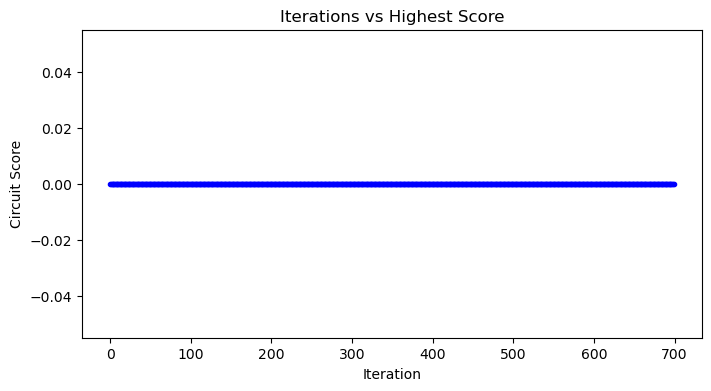

No solution


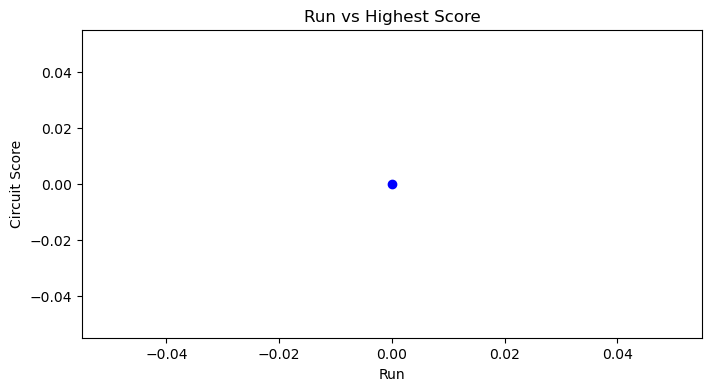

In [21]:
saved_run_results_circuit_score = []
saved_run_results_toxicity_score = []
run_number = []
num_runs = 1
top_circuit_score = 0
top_toxicity_score = 0
top_solution = 0

for run in range(0, num_runs):
    Ginitial_solution, initial_solution = assign_random_repressors(adj_matrix, cello_v1_hill_function_parameters, gate_max_incoming_signals_df)
    #initial_solution = [0, 1, 3, 10, 19]
    MAXTEMP = 100.0
    MINTEMP = 0.001
    steps = 600
    T0_steps = 100

    optimized_score, optimized_toxicty, optimized_solution = simulated_annealing_cello2_with_max_inputs_check(
        adj_matrix, initial_solution, MAXTEMP, MINTEMP, steps, T0_steps,
        input_signals_list_small_molecules, input_signals_list_binary,
        cello_v1_hill_function_parameters, gate_toxicity_df, gate_max_incoming_signals_df, D_GROWTH_THRESHOLD=0.75, plot = True)
    if not optimized_solution:
        print("No solution")
        
    else:
        G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, optimized_solution)
     
        
    saved_run_results_circuit_score.append(optimized_score)
    saved_run_results_toxicity_score.append(optimized_toxicty)
    run_number.append(run)
  
    
    if (optimized_score > top_circuit_score) and optimized_toxicty >= 0.75 and (not is_roadblocking(G)[0]):
        #print("here")
        top_circuit_score = optimized_score
        top_toxicity_score = optimized_toxicty
        top_solution = optimized_solution 
        
# Plotting iterations vs highest score
plt.figure(figsize=(8, 4))
plt.scatter(run_number, saved_run_results_circuit_score, color='b')
plt.title('Run vs Highest Score')
plt.xlabel('Run')
plt.ylabel('Circuit Score')
plt.show()

In [ ]:
G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, top_solution) 
print("Synthetic gene circuit")
draw_network_with_colors_and_labels_from_G(G)

actual_logic = simulate_signal_propagation(G, input_signals_list_small_molecules)
expected_logic = simulate_signal_propagation_binary(G, input_signals_list_binary)
circuit_score = calculate_circuit_score(expected_logic, actual_logic)
toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, G, gate_toxicity_df)
circuit_score, toxicity_score, is_roadblocking(G)

This runs SA for selected valid permutations of the input

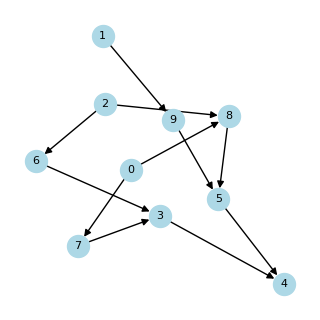

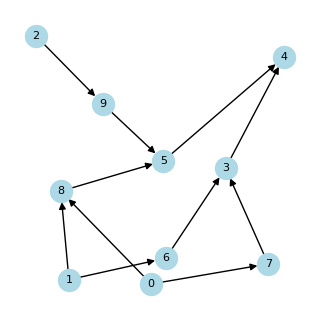

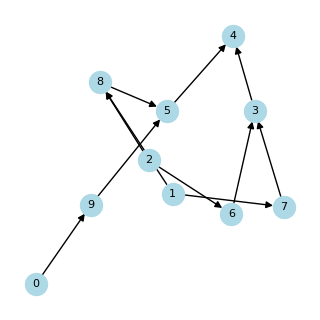

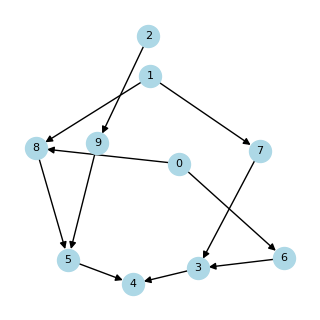

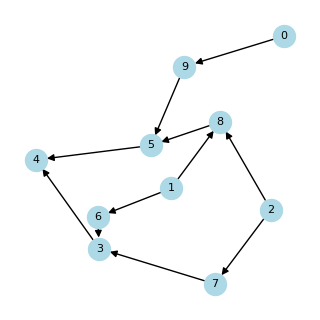

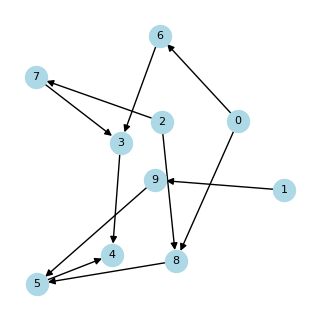

In [24]:
#View the permutations

def small_topology_plot(graph_networkx):
    pos = nx.spring_layout(graph_networkx)
    color = 'lightblue'
    plt.figure(figsize=(3, 3))
    nx.draw(graph_networkx, pos, with_labels=False, node_color=color, node_size=250, font_size=10, font_weight='bold')
    nx.draw_networkx_labels(graph_networkx, pos, font_size=8, font_color='black')
    plt.show()

for topology_permutation in permuted_graphs:
    small_topology_plot(topology_permutation) 


In [26]:
selected_indices = [1, 2, 3, 4]
selected_permuted_graphs = [permuted_graphs[i] for i in selected_indices]

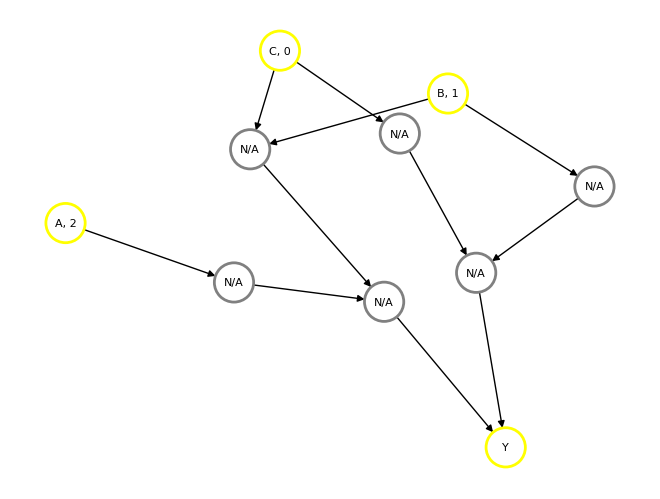

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

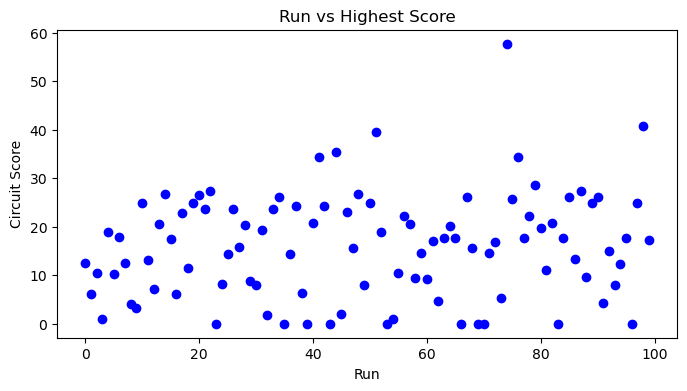

Synthetic gene circuit


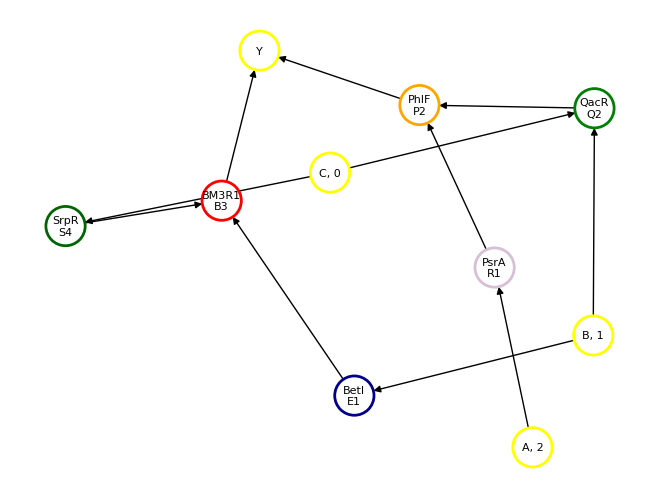

Circuit score:  57.69397518507821
Toxicity score:  0.7542254682935003


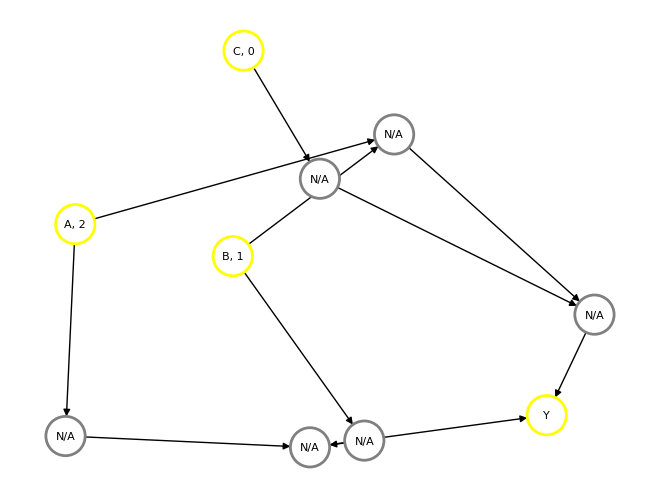

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

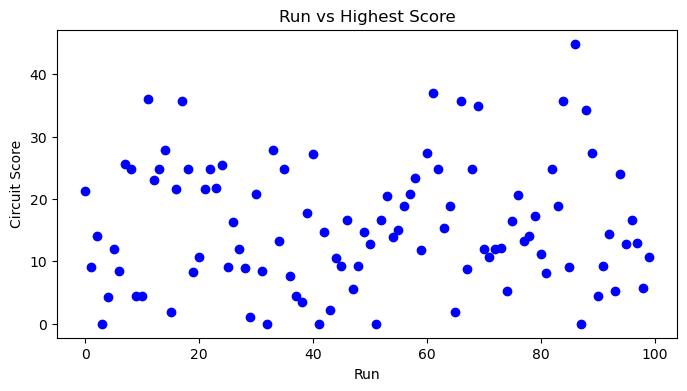

Synthetic gene circuit


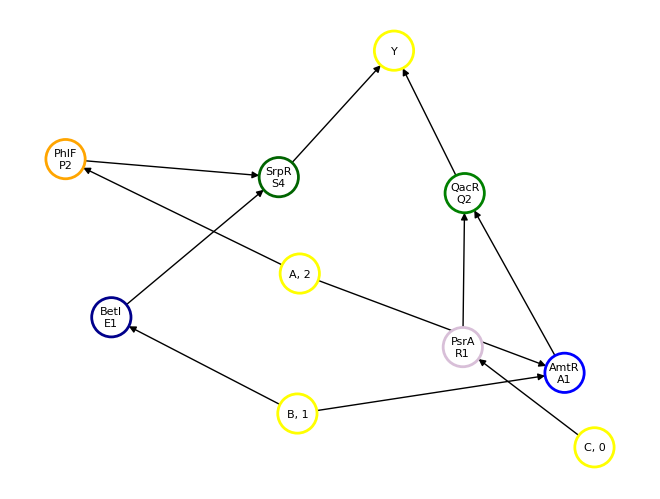

Circuit score:  44.87019736857331
Toxicity score:  0.7557301376082181


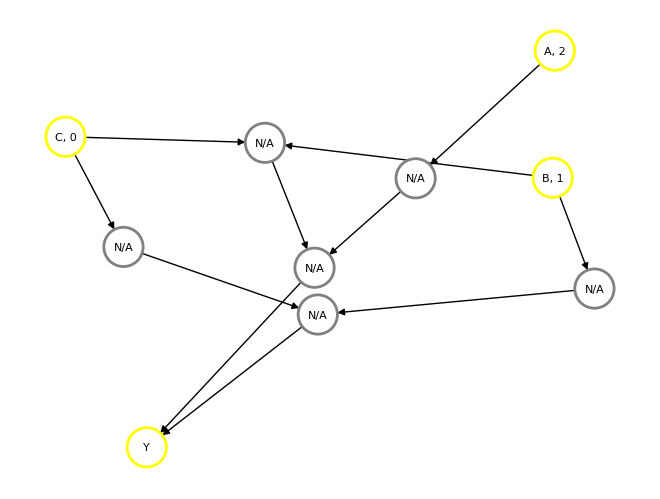

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

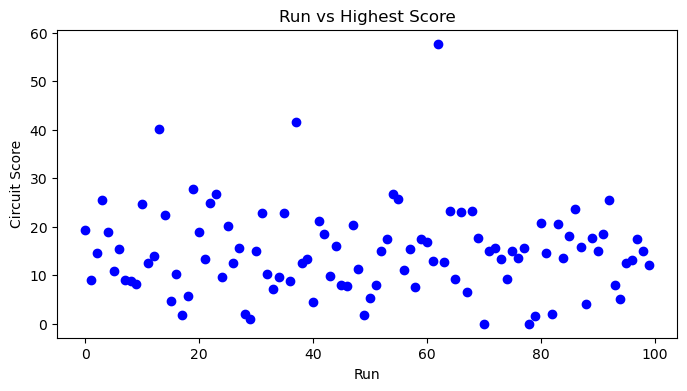

Synthetic gene circuit


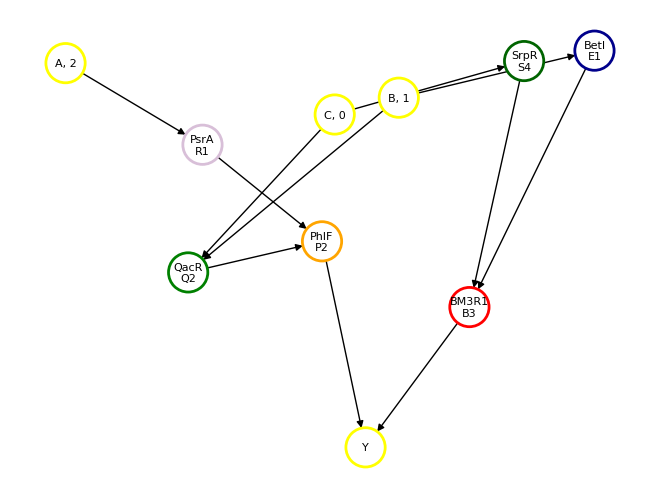

Circuit score:  57.69397518507821
Toxicity score:  0.7542254682935003


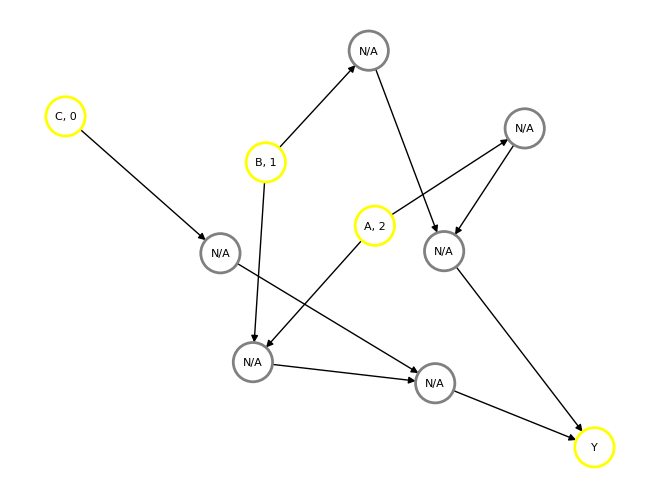

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

No solution


Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

Optimizing:   0%|          | 0/700 [00:00<?, ?it/s]

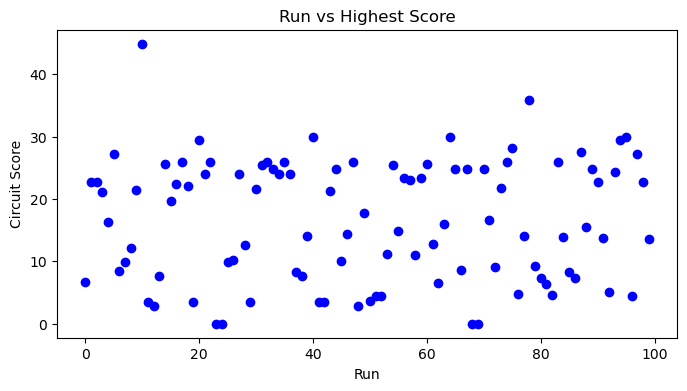

Synthetic gene circuit


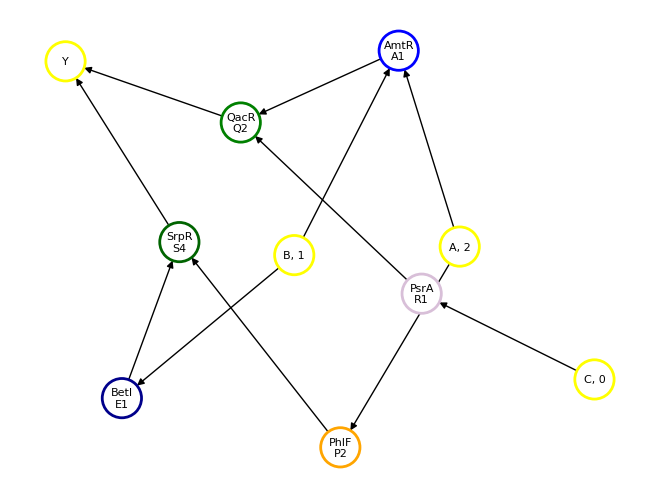

Circuit score:  44.87019736857331
Toxicity score:  0.7557301376082181


In [30]:
for gi, Gi in enumerate(selected_permuted_graphs):

    draw_network_with_colors_and_labels_from_G(Gi)
    nodelist = sorted(Gi.nodes())
    adj_matrix_sparse = nx.adjacency_matrix(Gi, nodelist=nodelist)
    adj_matrix_dense = adj_matrix_sparse.toarray()
    adj_matrix = adj_matrix_dense


    saved_run_results_circuit_score = []
    saved_run_results_toxicity_score = []
    run_number = []
    num_runs = 100
    top_circuit_score = 0
    top_toxicity_score = 0
    top_solution = 0

    for run in range(0, num_runs):
        Ginitial_solution, initial_solution = assign_random_repressors(adj_matrix, cello_v1_hill_function_parameters, gate_max_incoming_signals_df)
        #initial_solution = [0, 1, 3, 10, 19]
        MAXTEMP = 100.0
        MINTEMP = 0.001
        steps = 600
        T0_steps = 100

        optimized_score, optimized_toxicty, optimized_solution = simulated_annealing_cello2_with_max_inputs_check(
            adj_matrix, initial_solution, MAXTEMP, MINTEMP, steps, T0_steps,
            input_signals_list_small_molecules, input_signals_list_binary,
            cello_v1_hill_function_parameters, gate_toxicity_df, gate_max_incoming_signals_df, D_GROWTH_THRESHOLD=0.75, plot = False)
        if not optimized_solution:
            print("No solution")

        else:
            G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, optimized_solution)


        saved_run_results_circuit_score.append(optimized_score)
        saved_run_results_toxicity_score.append(optimized_toxicty)
        run_number.append(run)


        if (optimized_score > top_circuit_score) and optimized_toxicty >= 0.75 and (not is_roadblocking(G)[0]):
            #print("here")
            top_circuit_score = optimized_score
            top_toxicity_score = optimized_toxicty
            top_solution = optimized_solution 

    # Plotting iterations vs highest score
    plt.figure(figsize=(8, 4))
    plt.scatter(run_number, saved_run_results_circuit_score, color='b')
    plt.title('Run vs Highest Score')
    plt.xlabel('Run')
    plt.ylabel('Circuit Score')
    plt.show()
    
    G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, top_solution) 
    print("Synthetic gene circuit")
    draw_network_with_colors_and_labels_from_G(G)

    actual_logic = simulate_signal_propagation(G, input_signals_list_small_molecules)
    expected_logic = simulate_signal_propagation_binary(G, input_signals_list_binary)
    circuit_score = calculate_circuit_score(expected_logic, actual_logic)
    toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, G, gate_toxicity_df)
    circuit_score, toxicity_score, is_roadblocking(G)
    print("Circuit score: ", circuit_score)
    print("Toxicity score: ", toxicity_score)